<a href="https://colab.research.google.com/github/zhrvdt77/FDSFE_FBianco/blob/main/HW5/linear_regression_in_detail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

1970s — Marc and Helen Bernstein showed that walking speed is proportional to population size

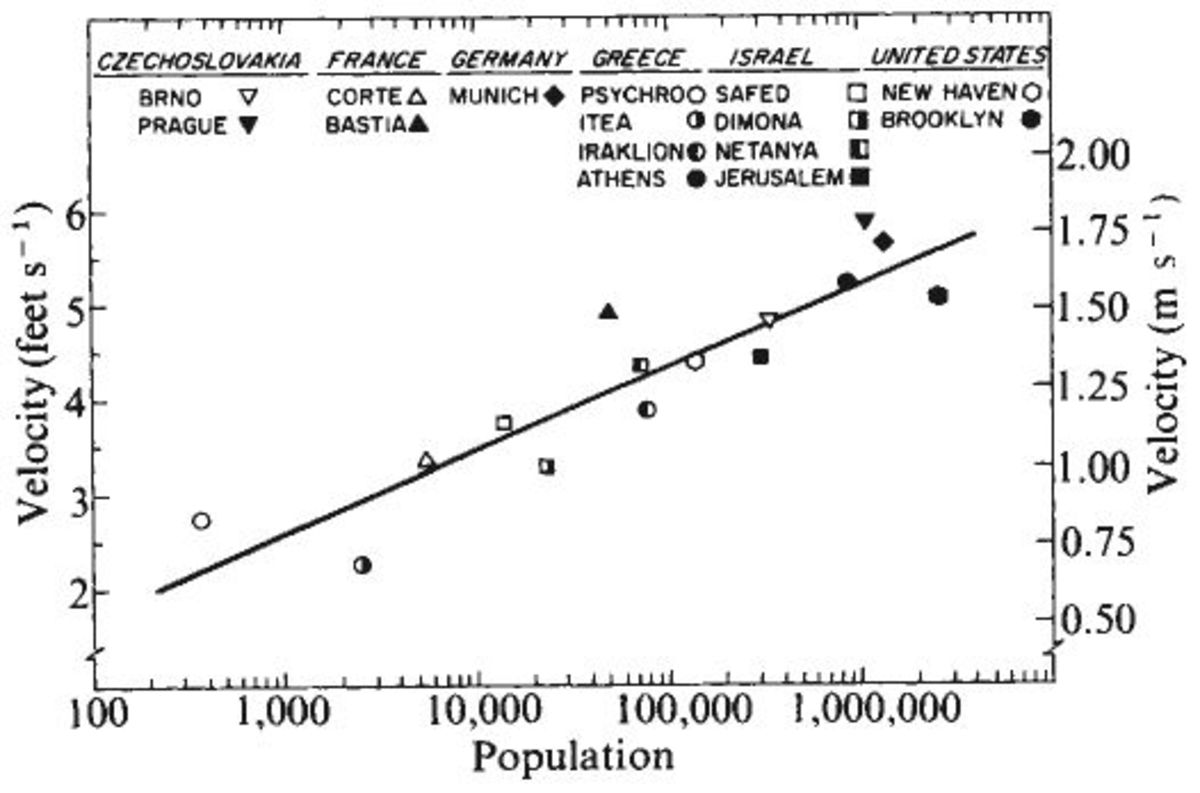

Bettencourt West et al. 2007 https://www.pnas.org/content/104/17/7301
(the top plot) is where I digitized the data from. Also read if you want https://www.bloomberg.com/news/articles/2012-03-21/why-people-in-cities-walk-fast

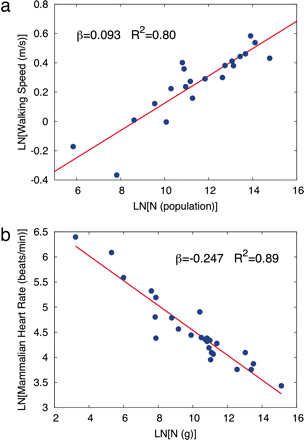

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/fedhere/PUS2022_FBianco/main/data/walkingspeed_Bettencourt07.csv", header=None, names=["population","wspeed"])

In [14]:
df

population  wspeed
0       2520.0    2.28
1        370.0    2.79
2       5650.0    3.37
3      14100.0    3.76
4      23300.0    3.31
5      52600.0    4.91
6      73300.0    4.40
7      77100.0    3.90
8     145000.0    4.40
9     320000.0    4.49
10    341000.0    4.89
11    896000.0    5.23
12   2620000.0    5.08
13   1420000.0    5.68
14   1070000.0    5.93

<Axes: xlabel='population', ylabel='wspeed'>

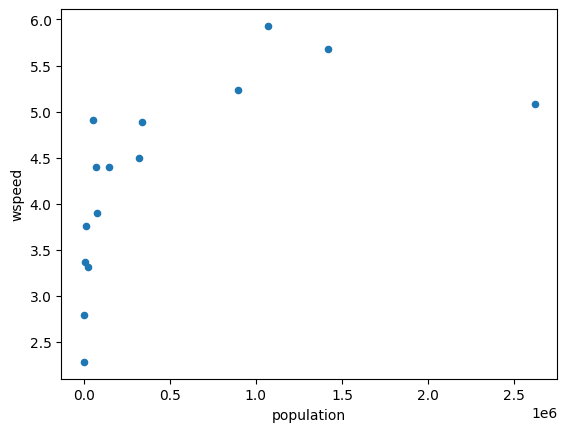

In [2]:
df.plot("population","wspeed",kind="scatter")

In [24]:
np.log10(df.population)

0     0.531658
1     0.409629
2     0.574268
3     0.617966
4     0.640219
5     0.674033
6     0.687092
7     0.689047
8     0.712765
9     0.740769
10    0.742941
11    0.774685
12    0.807420
13    0.789037
14    0.780273
Name: population, dtype: float64

The linear relationship is predicted in log normal space, which means we expect a linear relationship between the walking speed and the logarithm (base 10) of the population

In [3]:
import numpy as np
df["population"] = np.log10(df.population)

In [28]:
df

population  wspeed
0     0.531658    2.28
1     0.409629    2.79
2     0.574268    3.37
3     0.617966    3.76
4     0.640219    3.31
5     0.674033    4.91
6     0.687092    4.40
7     0.689047    3.90
8     0.712765    4.40
9     0.740769    4.49
10    0.742941    4.89
11    0.774685    5.23
12    0.807420    5.08
13    0.789037    5.68
14    0.780273    5.93

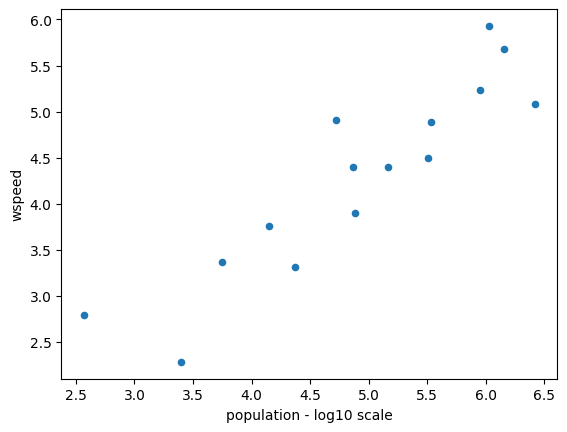

In [4]:
ax = df.plot("population", "wspeed", kind="scatter")
ax.set_xlabel("population - log10 scale");

Text(0.5, 0, 'population - log10 scale')

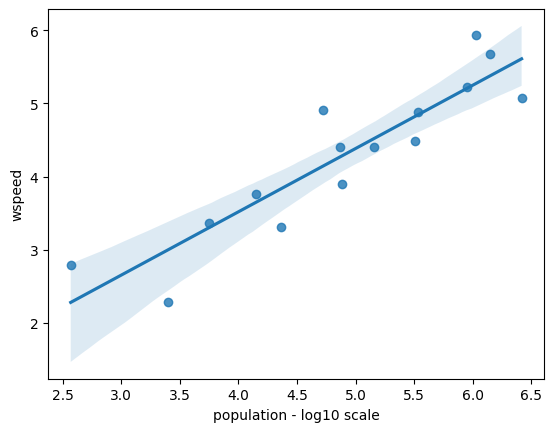

In [5]:
import seaborn as sns
ax=sns.regplot(x=df["population"],y=df["wspeed"])
ax.set_xlabel("population - log10 scale")

# fastest way to fit _but this is only for plots_ not for analysis
use seaborn (plotting package)

# many ways to fit a line to data with python


## minimizing an objective function directly
you can do it entirely by end and miminize the objective function in a for loop.
 this is slow and inefficient


In [7]:
# make a function for the model
def line(x, slope, intercept):
  return (slope * x + intercept)

In [8]:
# objective function: sum squared errors (SSE)
def sumsqerror(y, yp):
  return ((y - yp) ** 2).sum()

In [11]:
minnow = 1e7
for s in np.arange(0, 5, 0.01):
  for i in np.arange(0, 5, 0.01):
    prediction = line(df["population"], s, i)
    sse = sumsqerror(df.wspeed, prediction)
    if sse < minnow:
      minnow = sse
      slope_manual, inrercept_manual = s, i

slope_manual, inrercept_manual

(0.87, 0.03)

In [12]:
df["prediction_manual"] = line(df["population"], slope_manual, inrercept_manual)
df.head()

population  wspeed  prediction_manual
0    3.401401    2.28           2.989218
1    2.568202    2.79           2.264335
2    3.752048    3.37           3.294282
3    4.149219    3.76           3.639821
4    4.367356    3.31           3.829600

In [40]:
sumsqerror(df.wspeed.values, df.prediction_manual.values)

8.441048709905578

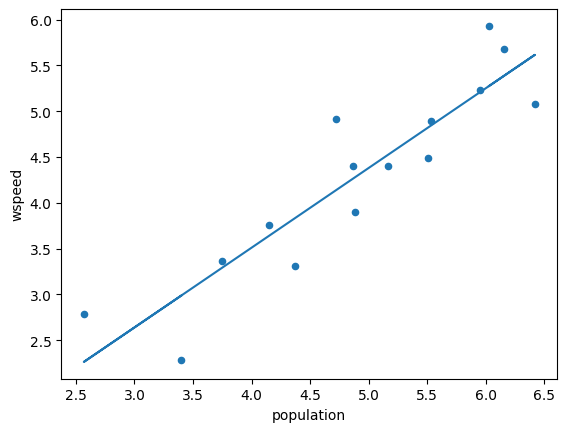

In [13]:
ax = df.plot("population", "wspeed", kind="scatter")
ax.plot(df["population"], df["prediction_manual"]);


a slope of 0.87 means that if I double the x value the y values grows by 0.85 * 2 = 1.7. This is a "sublinear growth" meaning that the y value grows slower than the x value (superlinear would be if slope > 1)

## with numpy

In [32]:
np.polyfit(df['population'], df['wspeed'], 1)


array([0.8653381 , 0.05664889])

In [33]:
slope, intercept = np.polyfit(df['population'], df['wspeed'], 1)
print("S:",slope,", intercept:",intercept)
# Making predictions from the slope and intercept obtained above
df['prediction_numpy'] = df['population'] * slope + intercept
# Displaying the output
df[['population', 'wspeed', 'prediction_numpy']].head()


S: 0.8653380983187897 , intercept: 0.05664889151453426


population  wspeed  prediction_numpy
0    3.401401    2.28          3.000010
1    2.568202    2.79          2.279012
2    3.752048    3.37          3.303439
3    4.149219    3.76          3.647126
4    4.367356    3.31          3.835888

<Axes: xlabel='population', ylabel='wspeed'>

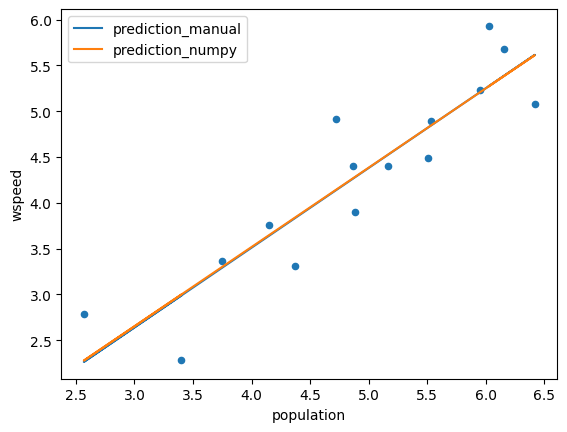

In [24]:
ax = df.plot("population", "wspeed", kind="scatter")
df.plot("population", "prediction_manual", kind="line", ax=ax)
df.plot("population", "prediction_numpy", kind="line", ax=ax)

same result as the earlier figure, up to numerical precision of my loop steps

## using sklearn

In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(df["population"], df["wspeed"])
reg.score(X, y)

ValueError: ignored

In [30]:
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X, np.array([1, 2])) + 3
X.shape, y.shape

((4, 2), (4,))

In [ ]:
df.loc[:, "population"]

0     3.401401
1     2.568202
2     3.752048
3     4.149219
4     4.367356
5     4.720986
6     4.865104
7     4.887054
8     5.161368
9     5.505150
10    5.532754
11    5.952308
12    6.418301
13    6.152288
14    6.029384
Name: population, dtype: float64

In [34]:
df.loc[:, "wspeed"]

0     2.28
1     2.79
2     3.37
3     3.76
4     3.31
5     4.91
6     4.40
7     3.90
8     4.40
9     4.49
10    4.89
11    5.23
12    5.08
13    5.68
14    5.93
Name: wspeed, dtype: float64

In [35]:
import numpy
reg = LinearRegression().fit(df["population"].values.reshape(-1, 1),
                             df["wspeed"].values)
reg.score(df["population"].values.reshape(-1, 1),
                             df["wspeed"].values)

0.8216814457855732

In [36]:
df["prediction_skl"] = reg.predict(df["population"].values.reshape(-1, 1))

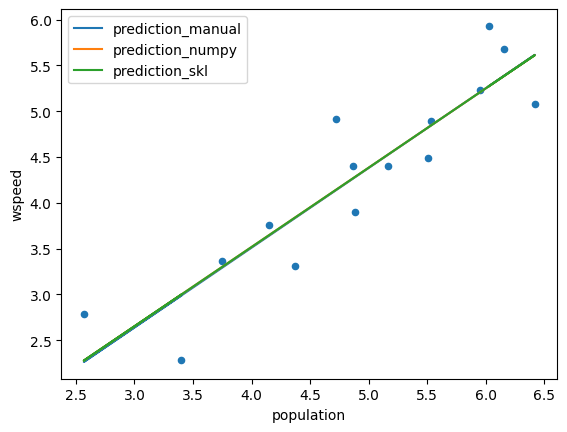

In [37]:
ax = df.plot("population", "wspeed", kind="scatter")
df.plot("population", "prediction_manual", kind="line", ax=ax)
df.plot("population", "prediction_numpy", kind="line", ax=ax)
df.plot("population", "prediction_skl", kind="line", ax=ax);


In [40]:
X = df['population']
y = df['wspeed']


In [41]:
X

0     3.401401
1     2.568202
2     3.752048
3     4.149219
4     4.367356
5     4.720986
6     4.865104
7     4.887054
8     5.161368
9     5.505150
10    5.532754
11    5.952308
12    6.418301
13    6.152288
14    6.029384
Name: population, dtype: float64

In [42]:
X=sm.add_constant(X)

In [43]:
X

const  population
0     1.0    3.401401
1     1.0    2.568202
2     1.0    3.752048
3     1.0    4.149219
4     1.0    4.367356
5     1.0    4.720986
6     1.0    4.865104
7     1.0    4.887054
8     1.0    5.161368
9     1.0    5.505150
10    1.0    5.532754
11    1.0    5.952308
12    1.0    6.418301
13    1.0    6.152288
14    1.0    6.029384

## using statsmodels
this provide thorough diagnostics to assess the model's merit

In [ ]:
import statsmodels.api as sm
# Let's declare our X and y variables
X = df['population']
y = df['wspeed']
# With Statsmodels, we need to add our intercept term, B0, manually
X = sm.add_constant(X)
X.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const  population
0    1.0    3.401401
1    1.0    2.568202
2    1.0    3.752048
3    1.0    4.149219
4    1.0    4.367356

In [44]:
model = sm.OLS(endog=y, exog=X)
results = model.fit()
# Show the summary
results.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 wspeed   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     59.90
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           3.21e-06
Time:                        21:32:54   Log-Likelihood:                -8.5829
No. Observations:                  15   AIC:                             21.17
Df Residuals:                      13   BIC:                             22.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0566      0.560      0.101      0.921      -1.154       1.267
population     0.8653      0.112      7.740      0.000       0.624       1.107
==============================================================================
Omnibus:                        0.456   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.531
Skew:                           0.115   Prob(JB):                        0.767
Kurtosis:                       2.107   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

check the slide to see how to read the diagnostics

In [45]:
#alternative: statsmodel formula that could be useful if you wanted to create more complicated models
import statsmodels.formula.api as smf

In [46]:
mod = smf.ols(formula='wspeed ~ population', data=df)
res = mod.fit()
res.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 wspeed   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     59.90
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           3.21e-06
Time:                        21:33:54   Log-Likelihood:                -8.5829
No. Observations:                  15   AIC:                             21.17
Df Residuals:                      13   BIC:                             22.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0566      0.560      0.101      0.921      -1.154       1.267
population     0.8653      0.112      7.740      0.000       0.624       1.107
==============================================================================
Omnibus:                        0.456   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.531
Skew:                           0.115   Prob(JB):                        0.767
Kurtosis:                       2.107   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
res.predict()

array([3.00001037, 2.27901169, 3.30343936, 3.64712627, 3.83588836,
       4.14189772, 4.26660871, 4.28560323, 4.52297726, 4.8204649 ,
       4.84435204, 5.20740779, 5.61064953, 5.38045839, 5.27410438])

In [50]:
mod = smf.ols(formula='wspeed ~ I(population**2) + population',
              data=df)
res2 = mod.fit()

res2.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 wspeed   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     28.41
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           2.81e-05
Time:                        21:35:05   Log-Likelihood:                -8.4158
No. Observations:                  15   AIC:                             22.83
Df Residuals:                      12   BIC:                             24.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.0889      2.067      0.527      0.608      -3.415       5.593
I(population ** 2)     0.0513      0.099      0.520      0.613      -0.164       0.266
population             0.3916      0.918      0.426      0.677      -1.609       2.392
==============================================================================
Omnibus:                        0.026   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.238
Skew:                           0.051   Prob(JB):                        0.888
Kurtosis:                       2.392   Cond. No.                         507.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
import matplotlib.pyplot as plt

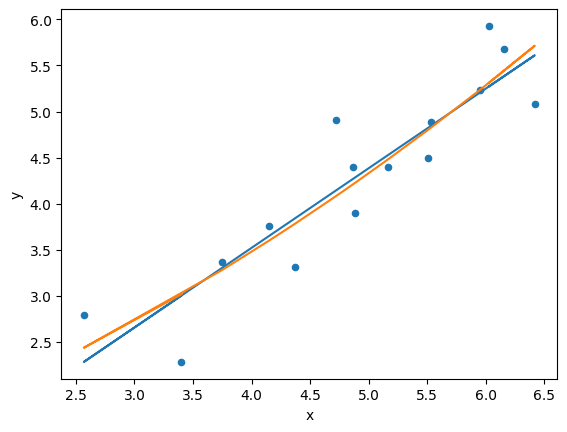

In [54]:
ax = df.plot("population", "wspeed", kind="scatter")
ax.plot(df.population, res.predict(df))
ax.plot(df.population, res2.predict(df))
plt.xlabel('x')
plt.ylabel('y');

the curve fit is similar to the line fir: is it actually better?

In [55]:
compareLR_result = res2.compare_lr_test(res)

In [ ]:
alpha ...
if ...
  statement = "CANNOT REJECT"
else:
  statement = "REJECT"

print('the NH is that the more complex model is better than the simpler one\n\n' ,
'''the likelihood ratio statistics is {0:.2f}, which corresponds to a p-value of {1:.2f}\n
since the likelihood ratio statistics is chi square distributed
with DoF the difference in the number of parameters in the 2 models (={2:.0f} here)
this means we {3:}  the NH at alpha {4:.2f}'''.format(*compareLR_result, statement, alpha))

the NH is that the more complex model is better than the simpler one

 the likelihood ratio statistics is 0.33, which corresponds to a p-value of 0.56

since the likelihood ratio statistics is chi square distributed
with DoF the difference in the number of parameters in the 2 models (=1 here)
this means we CANNOT REJECT  the NH at alpha 0.05


# quantifying the quality of the fit

In [56]:
res.params

Intercept     0.056649
population    0.865338
dtype: float64

In [57]:
res.conf_int()

0         1
Intercept  -1.153880  1.267177
population  0.623798  1.106878

In [ ]:
from statsmodels.stats.outliers_influence import summary_table
st, data, ss2 = summary_table(res, alpha=0.05)
data.shape

(15, 12)

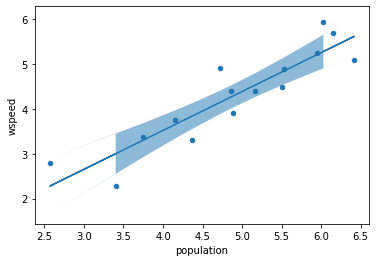

In [ ]:

predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,4:6].T
fittedvalues = data[:,2]
predict_mean_se  = data[:,3]
ax = df.plot("population", "wspeed", kind="scatter")
ax.plot(df.population, res.predict(df))
ax.fill_between(df.population.values, predict_ci_low, predict_ci_upp, alpha=0.5)

# influence points



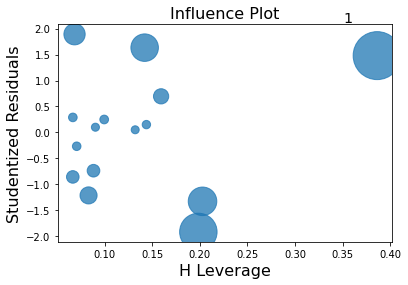

In [ ]:
sm.graphics.influence_plot(res);

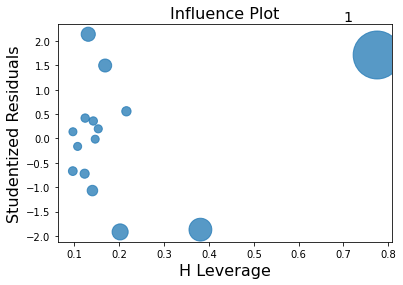

In [ ]:
sm.graphics.influence_plot(res2);

This function creates a “bubble” plot of Studentized residuals versus hat leverage values. The influence plot helps you identify data points that might have strong influence over the model fit. Unusual data points can be unusual because they have an unusual X values (at the edge of the distribution), or because their y value is an "outlier". Points that are both are on the top right of the plot and are high influence points. The influence of the point measured as Cook's distance is represented by the size of the bubble.